# Predicting Customer Response to Bank Marketing Campaigns Using Neural Networks
## Objectives
This project analyzes the Bank Marketing dataset using a neural network-based classification model to predict whether a client will subscribe to a term deposit. It addresses key issues such as class imbalance, high-cardinality categorical features, and overfitting using appropriate preprocessing and machine learning techniques.

## 1. Introduction
Marketing campaigns in the banking sector rely heavily on customer profiling to maximize conversion rates. This project leverages machine learning to predict the likelihood of a customer subscribing to a term deposit offer, helping businesses optimize outreach strategies.

### Data Source
Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

In [ ]:
# install libraries
# run this cell once for libraries installation

!pip install category_encoders


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path in your Google Drive
file_path = '/content/drive/My Drive/AIG 100/Project 03/bank-additional-full.csv'

# Load the dataset
df = pd.read_csv(file_path, sep=';')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Data Exploration

Task: Explore the loaded dataset to understand the features, target variable, and potential data quality issues.

### 2.1 Examine Data Shape and Data Types

In [ ]:
print("Shape of the data:", df.shape)

print("\nData types of each column:\n", df.dtypes)

Shape of the data: (41188, 21)

Data types of each column:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### 2.2 Examine Numerical Featuers

In [ ]:
numerical_features = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
    ]
print("\nDescriptive statistics for numerical features:\n", df[numerical_features].describe())


Descriptive statistics for numerical features:
                age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std  

### 2.3  Examine Numerical Featuers Distributions

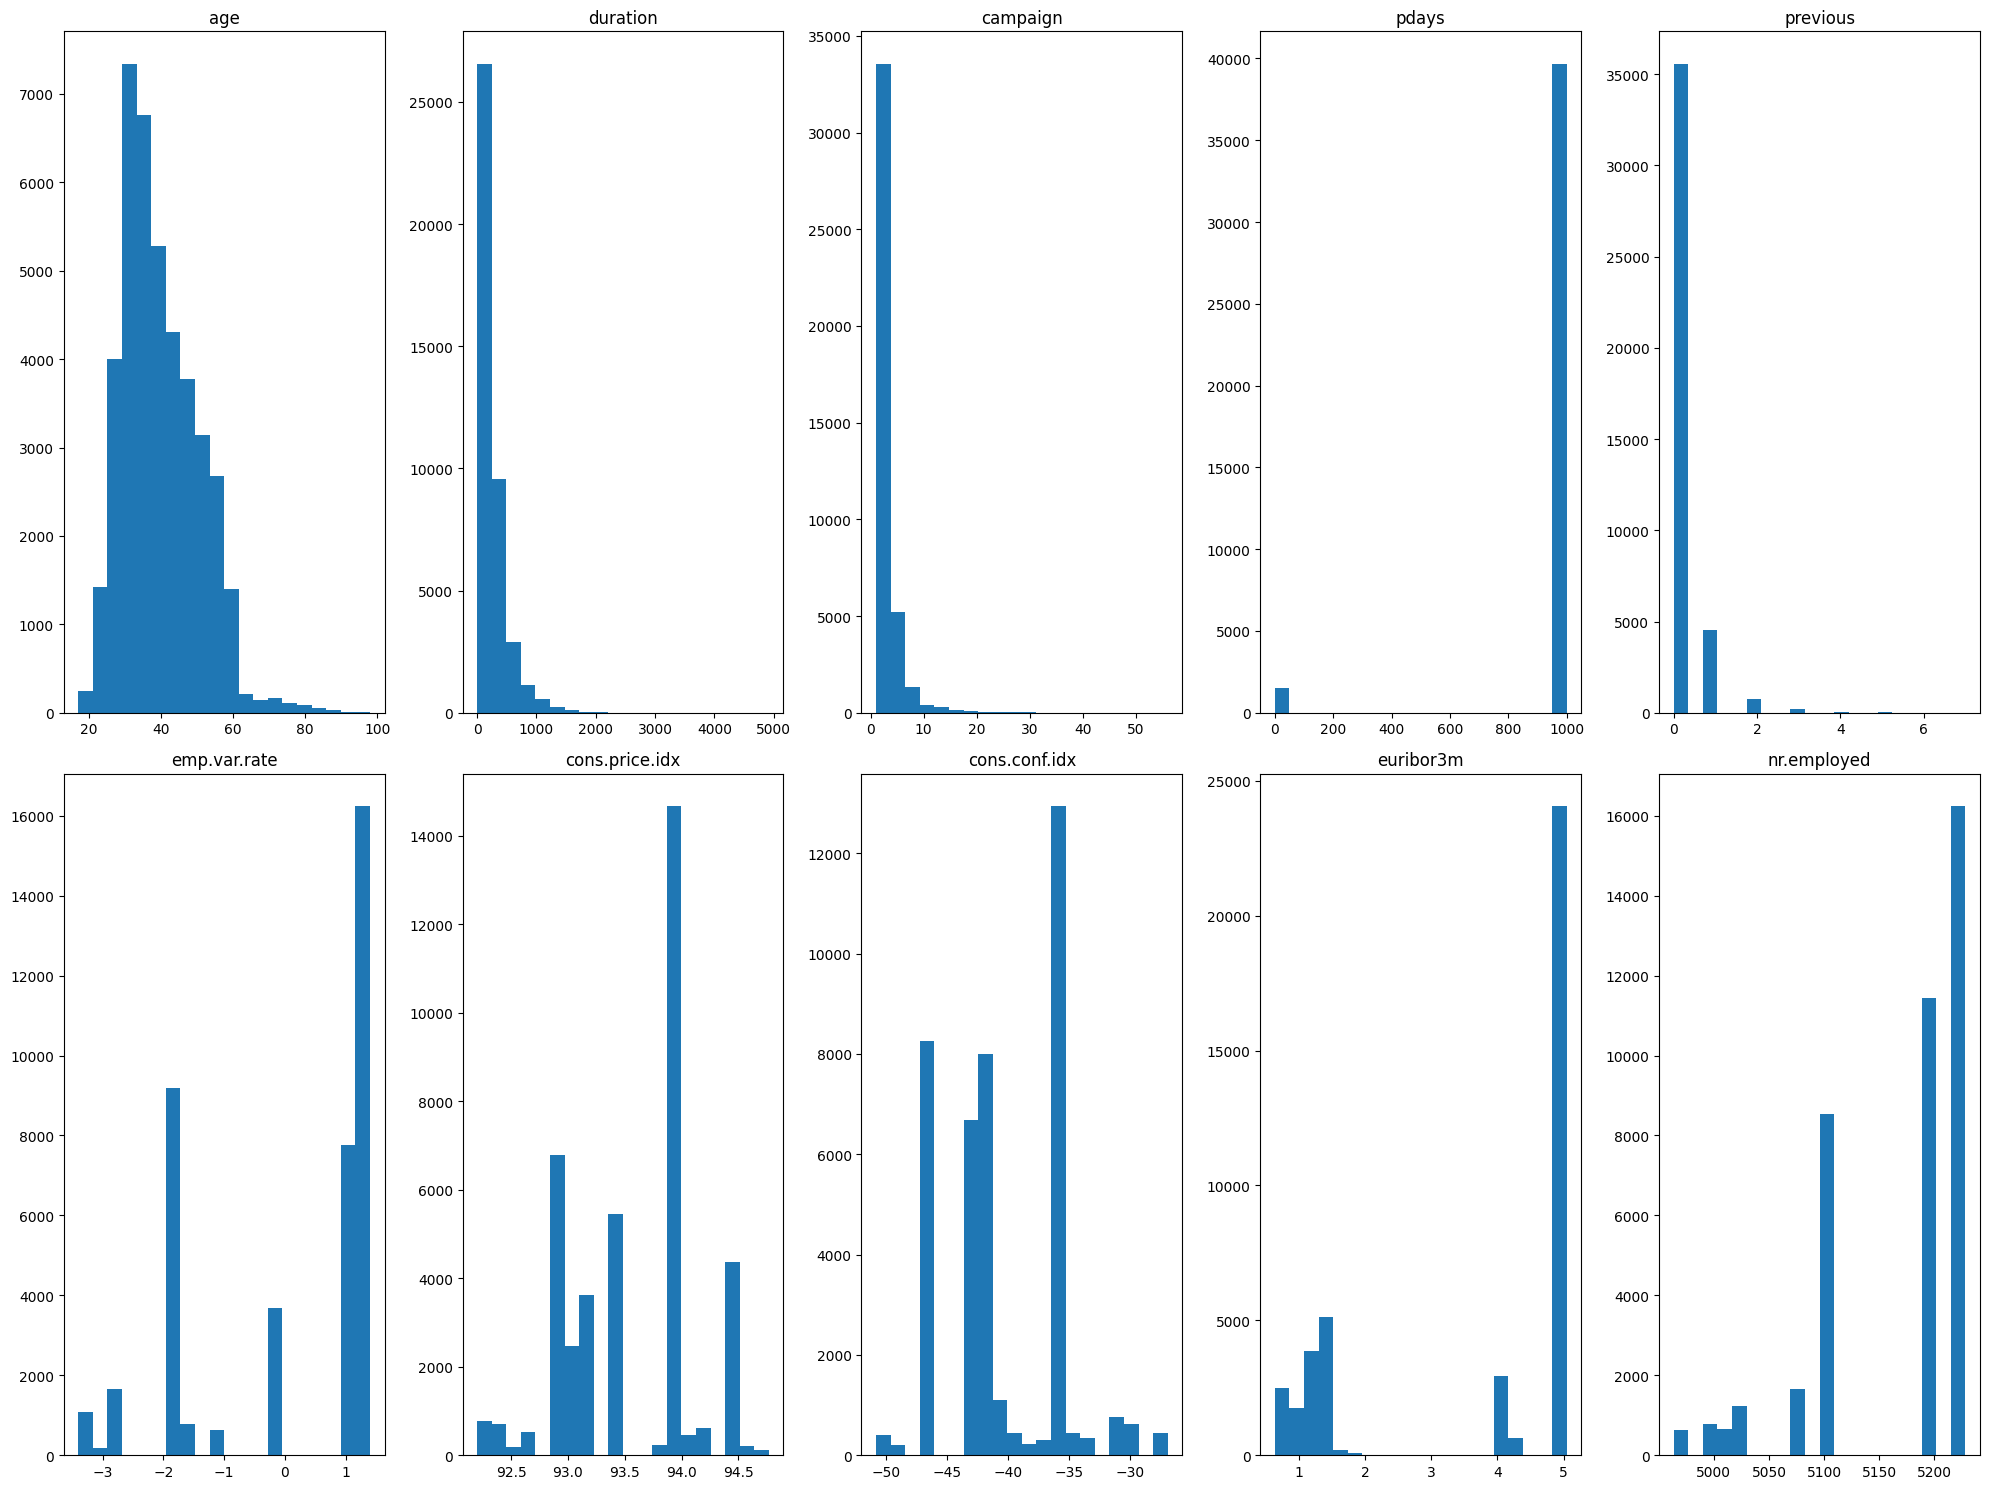

In [ ]:
# Get the number of numerical features
num_cols = len(numerical_features)
num_rows = (num_cols + 4) // 5

# Inspect numerical feature distributions.
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_features):
  plt.subplot(num_rows, 5, i + 1)
  plt.hist(df[column].dropna(), bins=20)
  plt.title(column)
plt.tight_layout()
plt.show()

### 2.4 Examine Categorical Featuers

In [ ]:
# Inspect categorical features
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome',
    'y'
]


for column in categorical_features:
    # Calculate value counts and percentages
    value_counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100  # Calculate percentages

    # Combine counts and percentages into a DataFrame
    result_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
    result_df['Percentage'] = result_df['Percentage'].apply(lambda x: f'{x:.2f}%')

    print(f"\nUnique values and frequencies for {column}:\n{result_df}")



Unique values and frequencies for job:
               Count Percentage
job                            
admin.         10422     25.30%
blue-collar     9254     22.47%
technician      6743     16.37%
services        3969      9.64%
management      2924      7.10%
retired         1720      4.18%
entrepreneur    1456      3.54%
self-employed   1421      3.45%
housemaid       1060      2.57%
unemployed      1014      2.46%
student          875      2.12%
unknown          330      0.80%

Unique values and frequencies for marital:
          Count Percentage
marital                   
married   24928     60.52%
single    11568     28.09%
divorced   4612     11.20%
unknown      80      0.19%

Unique values and frequencies for education:
                     Count Percentage
education                            
university.degree    12168     29.54%
high.school           9515     23.10%
basic.9y              6045     14.68%
professional.course   5243     12.73%
basic.4y              4176     1

### 2.5 Identify Missing Values

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# No missing values - no need to look into percentage
#missing_values_percentage = (missing_values / len(df)) * 100
#print("\nPercentage of missing values in each column:\n", missing_values_percentage)#


Missing values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### 2.6 Identify Outliners
Task: Identify potential outliers in the features using boxplots.

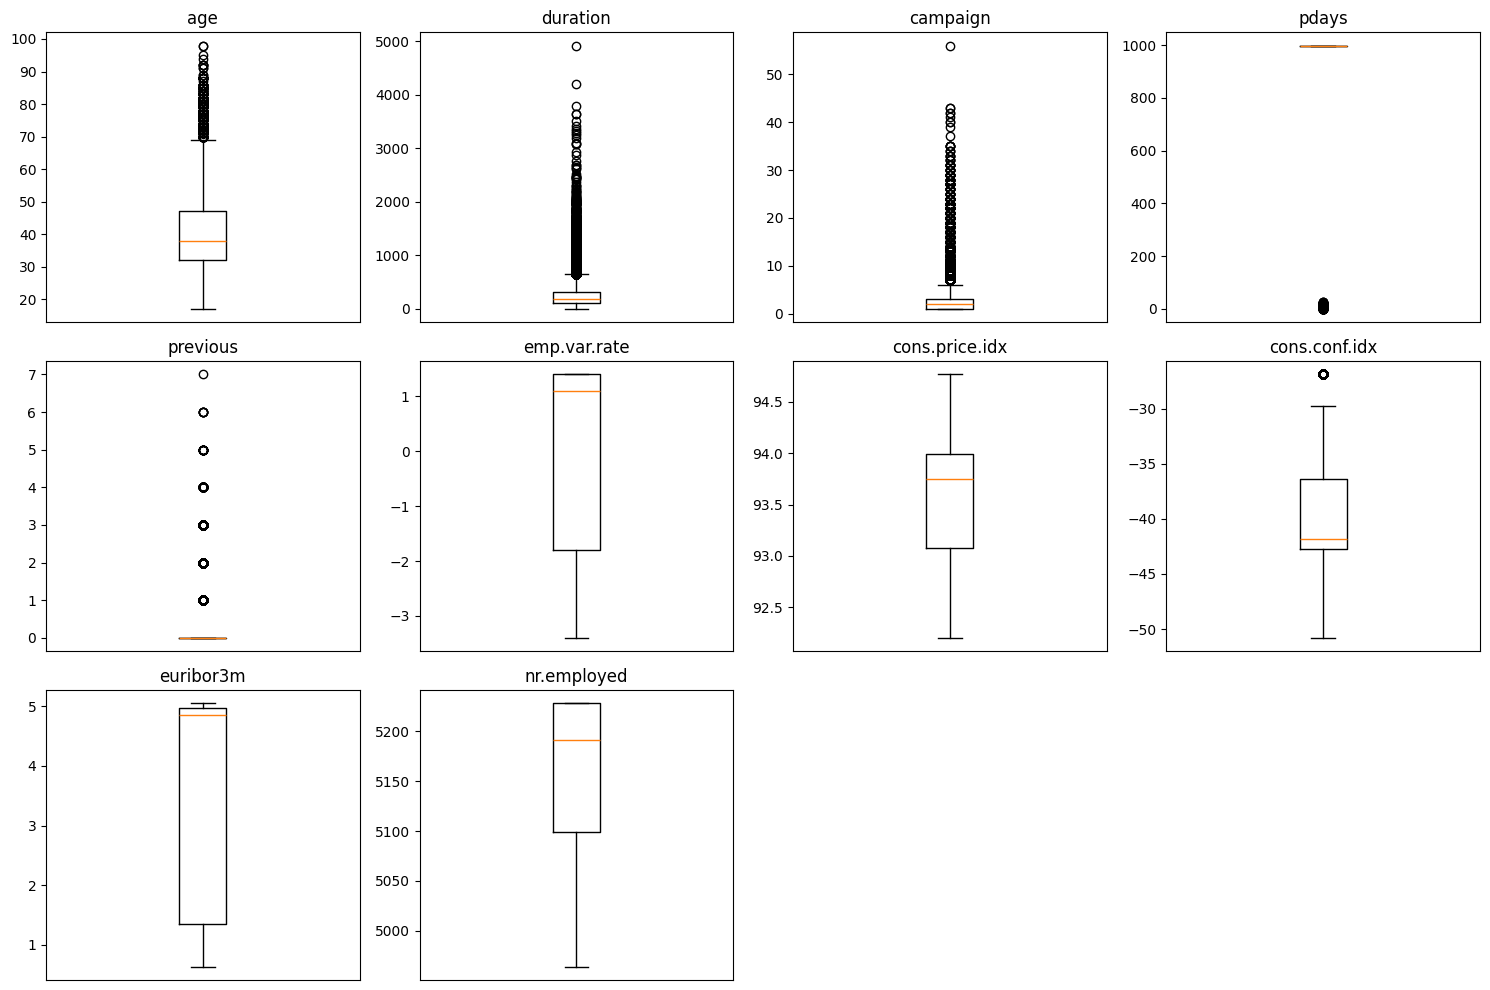

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
  plt.subplot(3, 4, i + 1)
  plt.boxplot(df[col])
  plt.title(col)
  plt.xticks([])
plt.tight_layout()
plt.show()



Correlation matrix for numerical features:
                      age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.00817

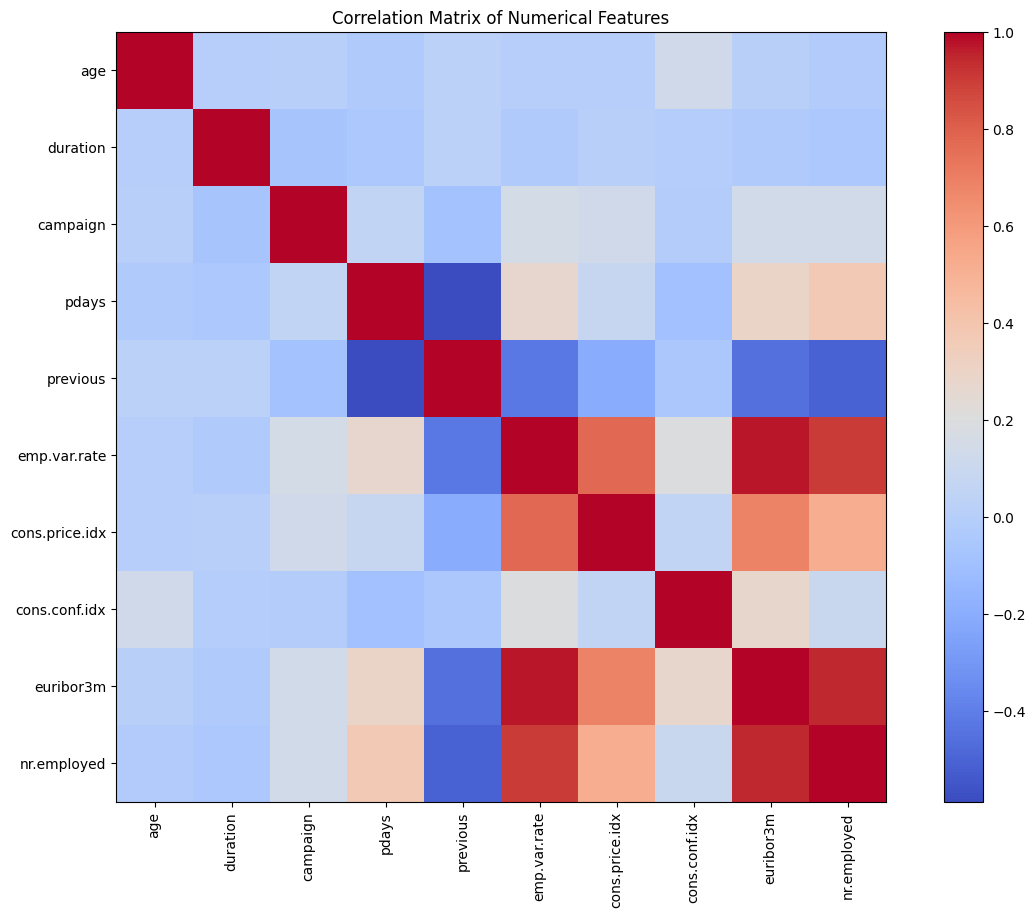

In [ ]:
# Explore the correlation between variables
correlation_matrix = df[numerical_features].corr() # Apply corr() to the DataFrame
print("\nCorrelation matrix for numerical features:\n", correlation_matrix)

plt.figure(figsize=(15, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 2.7 Observations


**Numerical Features: Observations & Preprocessing Actions**

| **Feature**        | **Observations**                                                                                   | **Action**                                        |
|--------------------|----------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| `age`              | Range: 17–98; slight right skew; elderly outliers present                                         | Apply **StandardScaler**; **drop original `age`**         |
| `duration`         | Call duration in seconds; highly predictive but only known after the call ends | **Drop** due to data leakage; not usable at prediction time |
| `campaign`         | Number of contacts in current campaign; long right tail (max = 56)                                 | Apply **log(1+x) transformation** to reduce skew, then scale |
| `pdays`            | 999 = never contacted; other values = days since last contact                                     | Create binary feature `previously_contacted `; **drop original `pdays`** |
| `previous`         | Count of prior contacts; mostly 0                                                                  | Create binary feature: `was_contacted_before` = 1 if `previous` > 0, else 0; **drop original `previous`**             |
| `emp.var.rate`     | Employment variation rate; some negative values                                                    | Apply **StandardScaler**                                    |
| `cons.price.idx`   | Consumer price index; very little variation                                                        | Apply **StandardScaler**                                    |
| `cons.conf.idx`    | Consumer confidence index; mostly negative                                                         | Apply **StandardScaler**                                    |
| `euribor3m`        | 3-month Euribor rate; economic indicator                                                           | Apply **StandardScaler**                                    |
| `nr.employed`      | Quarterly average of the total number of employed citizens; limited range                                                                 | Apply **StandardScaler**                                    |


---

**Categorical Variables: Observations & Preprocessing Actions**

| **Feature**     | **Observations**                                                                 | **Action**                                       |
|------------------|----------------------------------------------------------------------------------|------------------------------------------------------------|
| `job`            | 12 categories; top 3 dominate; several rare classes                             | Apply **target encoding** to reduce dimensionality         |
| `marital`        | 3 major categories + a few unknowns                                              | Drop `unknown` values (80 rows); Use **one-hot encoding**           |
| `education`      | Hierarchical structure (e.g., basic < high school < university)                 | Apply **ordinal encoding** with custom mapping             |
| `default`        | 79% `no`, 21% `unknown`, only 3 `yes`                                            | Drop due to very low signal and imbalance                  |
| `housing`        | Binary with few `unknown`s                                                      | Binary encode (`yes`=1, `no`=0); Encode `unknown` as a third class |
| `loan`           | Similar to `housing`                                                            | Same as above: binary encode, encode `unknown` as a third class  |
| `contact`        | Two values: `cellular` and `telephone`                                          | Binary encode (`cellular`=1, `telephone`=0)                |
| `month`          | 12 values, skewed; some months rare                                              | Map months to **numeric (1–12)** for temporal meaning      |
| `day_of_week`    | Evenly distributed across weekdays                                               | Apply **one-hot encoding**                                 |
| `poutcome`       | 86% `nonexistent`; small `success` and `failure` groups                         | Apply **target encoding** to reflect outcome correlation   |
| `y` (target)     | Imbalanced: ~11% `yes`, ~89% `no`                                               | Binary encode (`yes`=1, `no`=0); handle imbalance with **class weights or SMOTE** |

---
**Feature Engineering: Combining Economic Indicators**

The correlation matrix revealed strong inter-correlations among `euribor3m` (Euro Interbank Offered Rate), `emp.var.rate` (Employment Variation Rate), and `cons.price.idx` (Consumer Price Index). This high degree of correlation suggests that these variables share a significant amount of information and likely reflect similar underlying trends in the broader economic climate.  Including all three variables in the model could lead to multicollinearity, which can destabilize coefficient estimates and reduce the model's ability to generalize.

While the variables capture related economic information, they operate on different scales.  `cons.price.idx` has a much larger magnitude compared to `euribor3m` and `emp.var.rate`.  To ensure that each variable contributes equitably to the combined feature and to prevent any single variable from dominating, we applied standardization using StandardScaler. Following standardization, `euribor3m`, `emp.var.rate`, and `cons.price.idx` were combined to create a single `economic index` feature. This index aims to represent the overall economic pressure or sentiment influencing customer behavior.


## 3. Data Cleaning and Preprocessing
Task: Apply label encoding, target encoding, and standard scaling to reduce dimensionality while preserving important signal.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

# Make a copy
data = df.copy()

# Drop rows with 'unknown' in 'marital'
data = data[data['marital'] != 'unknown']

# Drop 'default' & ''duration' columns entirely
data.drop('default', axis=1, inplace=True)
data.drop('duration', axis=1, inplace=True)

# Encode target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Binary encode 'housing' and 'loan' with 3-class label encoding
label_map = {'no': 0, 'yes': 1, 'unknown': 2}
data['housing'] = data['housing'].map(label_map)
data['loan'] = data['loan'].map(label_map)

# Binary encode 'contact'
data['contact'] = data['contact'].map({'telephone': 0, 'cellular': 1})

# Map 'month' to numerical
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
data['month'] = data['month'].map(month_map)

# One-hot encode 'marital' and 'day_of_week'
data = pd.get_dummies(data, columns=['marital', 'day_of_week'], drop_first=True)

# Ordinal encode 'education'
edu_order = {
    'illiterate': 0, 'unknown': 1, 'basic.4y': 2, 'basic.6y': 3,
    'basic.9y': 4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7
}
data['education'] = data['education'].map(edu_order)

# Target encode 'job', 'poutcome'
target_enc = TargetEncoder(cols=['job', 'poutcome'])
data[['job', 'poutcome']] = target_enc.fit_transform(data[['job', 'poutcome']], data['y'])

# pdays → create binary and drop original
data['previously_contacted '] = np.where(data['pdays'] != 999, 1, 0)
data.drop(columns=['pdays'], inplace=True)

# previous → create binary and drop original
data['was_contacted_before'] = np.where(data['previous'] > 0, 1, 0)
data.drop(columns=['previous'], inplace=True)

# campaign → log transform to reduce skew
data['campaign'] = np.log1p(data['campaign'])

# Standardize numerical features
numeric_cols = ['age', 'campaign', 'emp.var.rate', 'cons.price.idx',
                'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Drop original 'age', keep only scaled version
data.rename(columns={'age': 'age_scaled'}, inplace=True)

# Combined Standardized Economic Index (highly inter-correlated variables)
df['economic_index'] = df['euribor3m'] + df['emp.var.rate'] + df['cons.price.idx']
df.drop(['euribor3m', 'emp.var.rate', 'cons.price.idx'], axis=1, inplace=True)
# Standardization of the economic index
df[['economic_index']] = scaler.fit_transform(df[['economic_index']])

# Separate features and target
X = data.drop(columns='y')
y = data['y']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')


Training samples: 32886, Testing samples: 8222


## 4. Model Building
Tasks:
1. Use a feedforward neural network with dropout and early stopping to mitigate overfitting.
1. Applies both SMOTE and Class Weight imbalance data handling and compare their performance.

### 4.1 Model Description

The core of our predictive modeling is a flexible neural network architecture implemented using TensorFlow/Keras.  The build_and_train_model function encapsulates the construction and training process, allowing for systematic experimentation with different model configurations.  Key aspects of this model include:"

**4.1.1 Architecture**

+ Sequential Structure: The model is built as a Sequential neural network - a simple stack where data flows from one layer to the next in a single direction.
+ Input Layer: The initial Input layer defines the expected shape of the input data, matching the number of features in the training dataset (X_train.shape[1]). This prepares the model to receive the preprocessed customer and campaign features.
+ Dense Layers: The model employs Dense layers as its primary processing units. These are fully connected layers, where each neuron is connected to every neuron in the preceding layer. The number of neurons in the first Dense layer is determined by the layers[0] parameter, and subsequent hidden layers' sizes are specified by the remaining elements of the layers list. The activation parameter controls the activation function applied within these layers (e.g., 'relu' for introducing non-linearity).
+ Dropout Regularization: To mitigate overfitting, Dropout layers are incorporated after each Dense layer. The dropout_rate parameter sets the probability of neurons being randomly excluded during each training update, forcing the network to learn more robust features.
+ Output Layer: The final Dense layer has a single neuron with a 'sigmoid' activation function. This is standard for binary classification tasks, as it produces a probability between 0 and 1, representing the likelihood of a customer subscribing to a term deposit.

**4.1.2 Training Process**

+ Resampling/Class Weighting: The function addresses the class imbalance present in the dataset (where 'no' responses significantly outnumber 'yes' responses) using one of two strategies:
 + SMOTE (Synthetic Minority Oversampling Technique): If strategy is set to 'smote', the SMOTE algorithm generates synthetic samples for the minority class ('yes') to balance the class distribution.
 + Class Weighting: If strategy is set to 'class_weight', the class_weight argument in the model.fit method is used. class_weight.compute_class_weight calculates weights that inversely proportional to class frequencies, giving more importance to the minority class during training.
+ Optimizer: The model's weights are updated using either the 'adam' or 'rmsprop' optimizer, as specified by the optimizer parameter. The learning_rate parameter controls the step size of these updates.
+ Loss Function and Metrics: The model is compiled with the 'binary_crossentropy' loss function, appropriate for binary classification. 'accuracy' is used as the evaluation metric.
+ Early Stopping: To prevent overfitting and optimize training time, an EarlyStopping callback is implemented. Training is halted if the validation loss (val_loss) does not improve for patience epochs (set to 5), and the model's weights are restored to their best values.
+ Training Loop: The model is trained using the model.fit method, with validation_split=0.2 reserving 20% of the training data for validation. The epochs parameter sets the maximum number of training iterations, and batch_size determines the number of samples processed in each iteration.

**4.1.3  Parameters**

The build_and_train_model function is highly configurable, accepting the following parameters:

+ config_name (str): An identifier for the specific model configuration being trained.
+ layers (list): A list of integers defining the number of neurons in each Dense layer.
+ activation (str): The activation function to use in the Dense layers (e.g., 'relu', 'tanh').
+ dropout_rate (float): The dropout rate for the Dropout layers.
+ batch_size (int): The batch size used during training.
+ optimizer (str): The optimizer to use ('adam' or 'rmsprop').
+ learning_rate (float): The learning rate for the optimizer.
+ strategy (str, optional): The strategy for handling class imbalance ('smote' or 'class_weight'). Defaults to 'smote'.

In [ ]:
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf  # Import TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

def build_and_train_model(config_name, layers, activation, dropout_rate, batch_size, optimizer, learning_rate, strategy='smote'):
    print(f"Training Config {config_name} using strategy: {strategy.upper()}")

    # Handle resampling or class weighting
    if strategy == 'smote':
        smote = SMOTE(random_state=42)
        X_train_final, y_train_final = smote.fit_resample(X_train, y_train)
        class_weight_arg = None
    elif strategy == 'class_weight':
        X_train_final, y_train_final = X_train, y_train
        cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight_arg = {i: w for i, w in enumerate(cw)}
    else:
        raise ValueError("Unsupported strategy. Use 'smote' or 'class_weight'.")

    # Build the model (Sequential)
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(layers[0], activation=activation))
    model.add(Dropout(dropout_rate))

    for units in layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(learning_rate=learning_rate) if optimizer == 'adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train_final,
        y_train_final,
        validation_split=0.2,
        epochs=50,
        batch_size=batch_size,
        callbacks=[early_stop],
        class_weight=class_weight_arg,
        verbose=0
    )

    print(f"Training Config {config_name} complete.")
    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print("-" * 30)

    return model, history


### 4.1 SMOTE Imbalance Data Handling

In [ ]:
model_smote, hist_smote = build_and_train_model(
    config_name='model_smote',
    layers=[32, 16],
    activation='relu',
    dropout_rate=0.2,
    batch_size=32,
    optimizer='adam',
    learning_rate=0.001,
    strategy='smote'
)


Training Config model_smote using strategy: SMOTE
Training Config model_smote complete.
Final training accuracy: 0.7989
Final validation accuracy: 0.6475
------------------------------


### 4.2 Class Weight Imbalance Data Handling

In [ ]:
model_cw, hist_cw = build_and_train_model(
    config_name='model_class_weight',
    layers=[32, 16],
    activation='relu',
    dropout_rate=0.2,
    batch_size=32,
    optimizer='adam',
    learning_rate=0.001,
    strategy='class_weight'
)


Training Config model_class_weight using strategy: CLASS_WEIGHT
Training Config model_class_weight complete.
Final training accuracy: 0.8274
Final validation accuracy: 0.8214
------------------------------


## 5. Model Evaluation
Task: Assess model performance using precision, recall, F1-score, and ROC-AUC.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, threshold=0.5):
    """
    Evaluates a neural network model using various metrics.

    Args:
        model: The trained neural network model.
        X_test: The test data features.
        y_test: The test data target variable.
        threshold: The classification threshold (default is 0.5).

    Returns:
        None (Prints the evaluation metrics and plots)
    """
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > threshold).astype(int) # Apply the threshold

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(classification_report(y_test, y_pred))

    # ROC Curve and AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()



### 5.1 Evaluate SMOTE Model

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


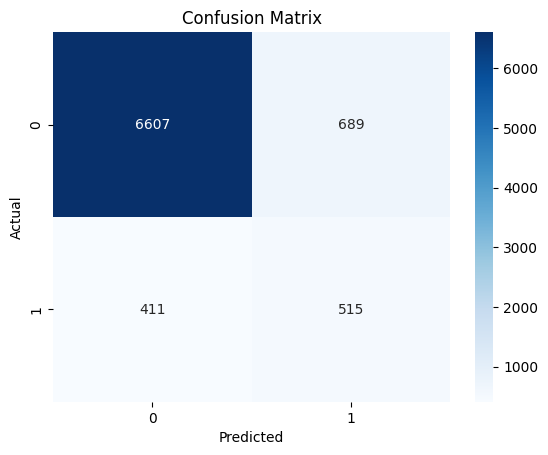

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7296
           1       0.43      0.56      0.48       926

    accuracy                           0.87      8222
   macro avg       0.68      0.73      0.70      8222
weighted avg       0.88      0.87      0.87      8222



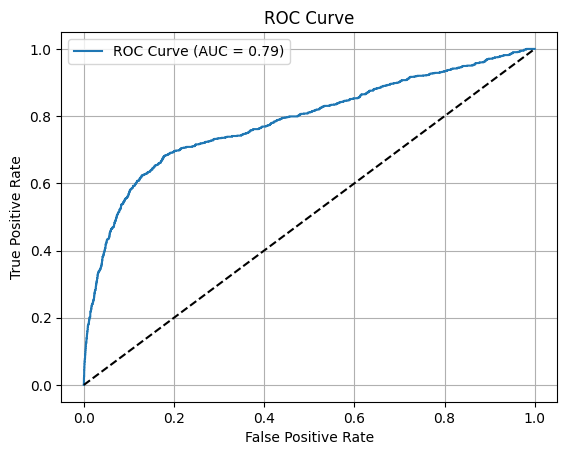

In [ ]:
evaluate_model(model_smote, X_test, y_test, threshold=0.5)

### 5.2 Evaluate Class Weight Model

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


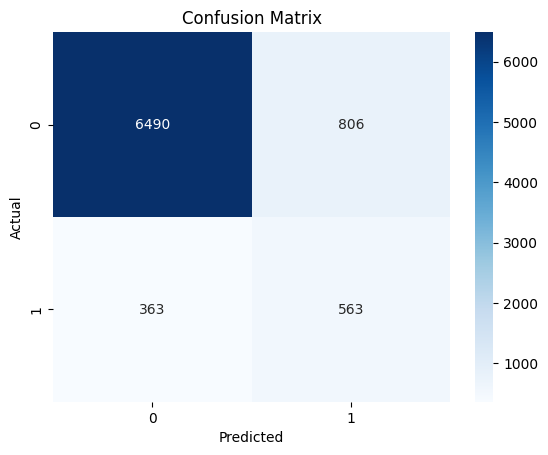

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7296
           1       0.41      0.61      0.49       926

    accuracy                           0.86      8222
   macro avg       0.68      0.75      0.70      8222
weighted avg       0.89      0.86      0.87      8222



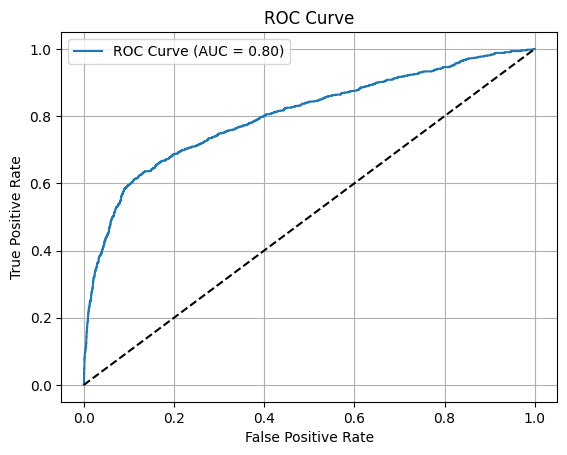

In [ ]:
evaluate_model(model_cw, X_test, y_test, threshold=0.5)

### 5.3 Imbalanced Data Handling Strategy

The training dynamics of the models trained with different imbalance handling strategies reveal important insights into their learning behavior and generalization capabilities:

* **SMOTE:**
    * Training Accuracy: 0.7989
    * Validation Accuracy: 0.6475
    * Interpretation: The relatively high training accuracy (0.7989) compared to the significantly lower validation accuracy (0.6475) suggests a potential overfitting issue with the SMOTE model. SMOTE generates synthetic samples, which can sometimes lead the model to memorize noise or specific patterns present in the synethic training data, hindering its ability to generalize well to unseen data.

* **Class Weight:**
    * Training Accuracy: 0.8274
    * Validation Accuracy: 0.8214
    * Interpretation: The Class Weight model exhibits a much closer alignment between training accuracy (0.8274) and validation accuracy (0.8214). This indicates better generalization, as the model is learning patterns that are more representative of the overall data distribution and is less prone to overfitting.

**Observations**

* **Overfitting:** The substantial gap between training and validation accuracy in the SMOTE model is a strong indicator of overfitting. This means that while the model performs well on the data it was trained on, it is likely to perform less effectively on new, unseen data.
* **Generalization:** The Class Weight model demonstrates superior generalization, as evidenced by the comparable training and validation accuracies. This suggests that it is learning more robust and generalizable patterns.
* **Model Selection Implications:** While training accuracy can be a useful metric, it is crucial to prioritize validation accuracy when selecting a model, as it provides a better estimate of real-world performance. In this case, the Class Weight model's strong generalization makes it a more reliable choice, despite the SMOTE model's higher training accuracy.

### 5.4 Model Performance Interpretation

5.4.1 **Imbalanced Data Handling Strategy**

A comparative analysis of the models trained with SMOTE and Class Weight (at a probability threshold of 0.5) reveals distinct performance characteristics:

| Metric             | SMOTE  | Class Weight |
| :----------------- | :----- | :----------- |
| True Positives (TP) | 515    | 563          |
| False Positives (FP) | 689    | 806        |
| False Negatives (FN) | 411    | 363           |
| True Negatives (TN)  | 6,607  | 6,490        |
| Accuracy           | 87%  | 86%        |
| Precision (Yes)    | 43%  | 41%        |
| Recall (Yes)       | 56%  | 61%        |
| F1-Score (Yes)     | 48%  | 49%        |
| AUC                | 0.79   | 0.80         |

**Observations:**

+ **Recall**: Class Weight still delivers a higher recall (61%) than SMOTE (56%), indicating it identifies a greater percentage of actual subscribers.
+ **Precision**: SMOTE has a slightly higher precision (43%) than Class Weight (41%), suggesting it makes fewer false positive predictions.
+ **F1-Score**: Class Weight has a marginally better F1-score (49%) compared to SMOTE (48%), reflecting a slightly better overall balance between precision and recall.


## 6. Threshold Optimization

As both models deliver similar level of performance at a probability threshold of 0.5. We shall attempt threshold sweeping to identify a better model for deployment.

Threshold sweeping helps evaluate how different classification thresholds impact metrics such as precision, recall, and F1-score. While recall is prioritized in the current context, F1-score provides a balanced view of model behavior and is useful for identifying a threshold that achieves high recall without degrading precision excessively. This analysis allows us to select a threshold that aligns best with campaign performance objectives.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

def threshold_sweep(model, X_test, y_test):
    """
    Performs threshold sweeping to find the optimal classification threshold.

    Args:
        model: The trained classification model.
        X_test: The test data features.
        y_test: The test data target variable.

    Returns:
        tuple: (best_threshold, best_f1, best_recall, best_precision) -
               The optimal threshold, corresponding F1 score, recall, and precision.
    """

    # Generate predicted probabilities
    y_pred_prob = model.predict(X_test).ravel()

    # Compute precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Compute F1 scores for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

    # Find threshold with max F1
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]
    best_recall = recall[best_idx]
    best_precision = precision[best_idx]


    # Plot F1 vs Threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
    plt.axvline(x=best_threshold, color='r', linestyle='--',
                label=f'Best Threshold = {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Classification Threshold')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Best Threshold: {best_threshold:.2f}")
    print(f"Best F1 Score: {best_f1:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    print(f"Best Precision: {best_precision:.4f}")

    return best_threshold, best_f1, best_recall, best_precision


### 6.1 Threshold Optimization for SMOTE Model

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


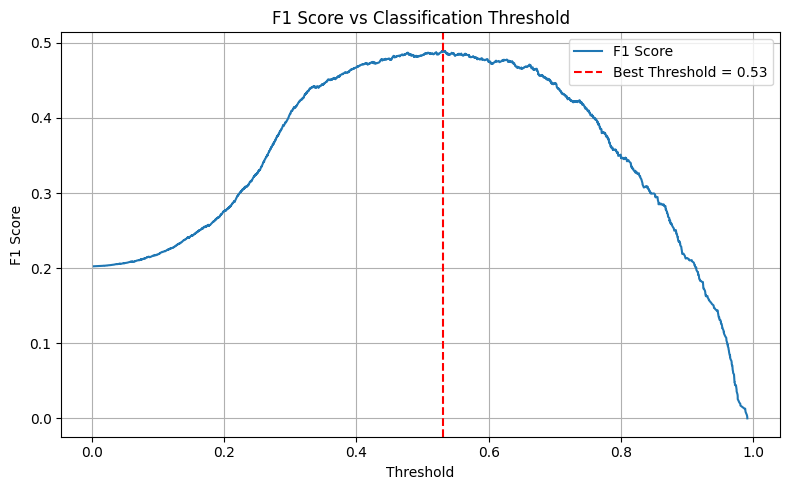

Best Threshold: 0.53
Best F1 Score: 0.4894
Best Recall: 0.5378
Best Precision: 0.4491


In [ ]:
best_threshold, best_f1, best_recall, best_precision = threshold_sweep(model_smote, X_test, y_test)

### 6.2 Threshold Optimization for Class Weight Model

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


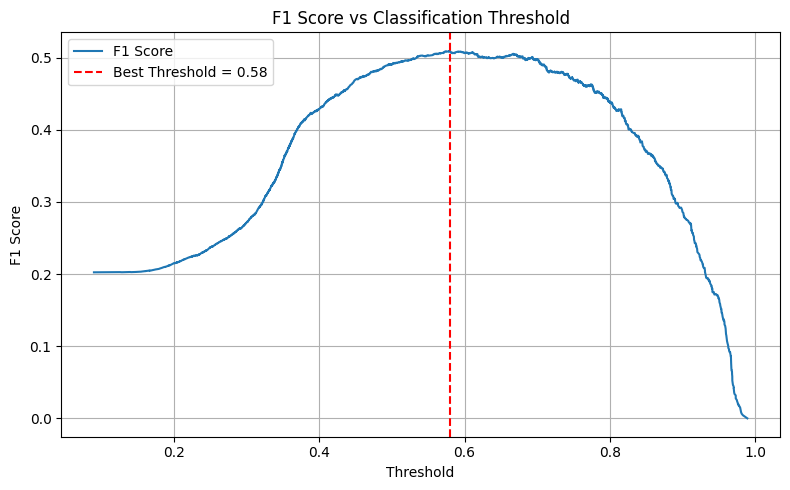

Best Threshold: 0.58
Best F1 Score: 0.5097
Best Recall: 0.5832
Best Precision: 0.4526


In [ ]:
best_threshold, best_f1, best_recall, best_precision = threshold_sweep(model_cw, X_test, y_test)

### 6.3 Threshold Optimization Results

+ **SMOTE**: At a threshold of 0.53, SMOTE achieved a balanced F1-score of 0.4894. However, its recall was relatively lower (0.5378), indicating a higher chance of missing potential subscribers.
+ **Class Weight**: With a threshold of 0.58, Class Weight exhibited a higher F1-score of 0.5097 and a notably higher recall of 0.5832. This suggests a better ability to identify potential subscribers, aligning with the campaign objective. While its precision (0.4526) is slightly lower than SMOTE's, the difference is not substantial.


---
### 6.4 Business Implications

In the context of real-world marketing objectives, missing a potential subscriber (false negative) carries a higher cost than contacting a non-subscriber (false positive). A model with higher recall shall be able to capture a higher proportion of actual subscribers. Under such circumstances, the **Class Weight** model with a threshold of 0.58 is recommended for deployment.


Although this comes with an increase in false positives, the cost of contacting a few uninterested clients may be a worthwhile trade-off if it helps prevent missing potential conversions. In practice, this means the bank can more confidently identify and engage clients likely to respond positively to campaigns. The model's behavior is now well-suited for use in **outreach optimization**, **target list generation**, and **campaign planning** where the goal is to **maximize reach among interested clients**.


## 7. Hyperparameter Tuning

After selecting the **Class Weight** model and identifying the optimal classification threshold (0.58), we shall further proceed with hyperparameter tuning to explore how network architecture and training configuration impact model performance. The goal was to find a balance between model complexity, generalization, and sensitivity to the minority class.

#### Tunable Hyperparameters

| Hyperparameter         | Values Explored                      | Purpose |
|------------------------|--------------------------------------|---------|
| Hidden Layer Sizes     | [32, 16], [64, 32, 16], [128, 64, 32] | Controls model complexity and depth |
| Activation Function    | 'relu', 'tanh'                       | Determines how neurons transform inputs |
| Dropout Rate           | 0.2, 0.3                             | Regularizes the model to prevent overfitting |
| Batch Size             | 32, 64                               | Affects convergence speed and gradient smoothness |
| Optimizer              | 'adam', 'rmsprop'                    | Controls weight updates during training |
| Learning Rate          | 0.001, 0.0005                        | Adjusts how fast the model learns |

#### Selected Configurations for Comparison

Three configurations were identified to test the impact of depth, activation function, dropout regularization, and optimization settings:

| Config | Layers           | Activation | Dropout | Batch Size | Optimizer | Learning Rate | Description |
|--------|------------------|------------|---------|-------------|-----------|----------------|-------------|
| A      | [32, 16]         | relu       | 0.2     | 32          | adam      | 0.001          | Baseline model with simple structure |
| B      | [64, 32, 16]     | relu       | 0.3     | 64          | adam      | 0.0005         | Moderate-depth model with increased regularization |
| C      | [128, 64, 32]    | tanh       | 0.3     | 64          | rmsprop   | 0.0005         | Deepest model with alternate activation and optimizer |

Each configuration was trained using class weights and evaluated at a fixed threshold of 0.58 for comparison purpose.

In [ ]:
# Define model configurations
model_configs = {
    'A': {
        'layers': [32, 16],
        'activation': 'relu',
        'dropout_rate': 0.2,
        'batch_size': 32,
        'optimizer': 'adam',
        'learning_rate': 0.001
    },
    'B': {
        'layers': [64, 32, 16],
        'activation': 'relu',
        'dropout_rate': 0.3,
        'batch_size': 64,
        'optimizer': 'adam',
        'learning_rate': 0.0005
    },
    'C': {
        'layers': [128, 64, 32],
        'activation': 'tanh',
        'dropout_rate': 0.3,
        'batch_size': 64,
        'optimizer': 'rmsprop',
        'learning_rate': 0.0005
    },
}

# Train and store models using class weighting strategy
models = {}
histories = {}

for config_name, config in model_configs.items():
    model, history = build_and_train_model(
        config_name=config_name,
        strategy='class_weight',  # Use class weighting for all configs
        **config
    )
    models[config_name] = model
    histories[config_name] = history


Training Config A using strategy: CLASS_WEIGHT
Training Config A complete.
Final training accuracy: 0.8235
Final validation accuracy: 0.8363
------------------------------
Training Config B using strategy: CLASS_WEIGHT
Training Config B complete.
Final training accuracy: 0.8330
Final validation accuracy: 0.8364
------------------------------
Training Config C using strategy: CLASS_WEIGHT
Training Config C complete.
Final training accuracy: 0.7871
Final validation accuracy: 0.7776
------------------------------


257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


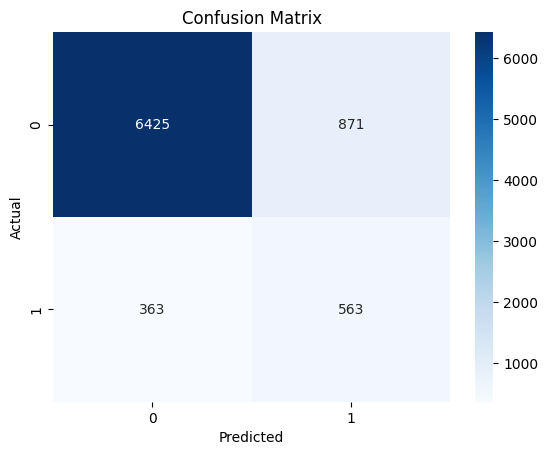

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7296
           1       0.39      0.61      0.48       926

    accuracy                           0.85      8222
   macro avg       0.67      0.74      0.69      8222
weighted avg       0.88      0.85      0.86      8222



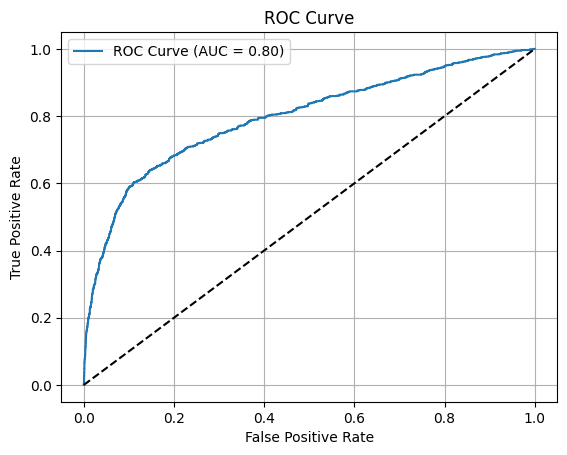

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


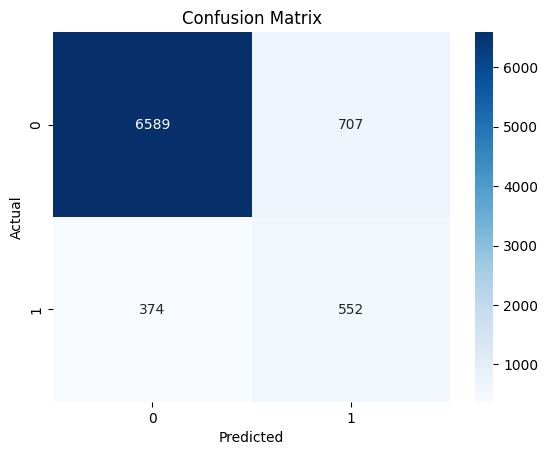

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7296
           1       0.44      0.60      0.51       926

    accuracy                           0.87      8222
   macro avg       0.69      0.75      0.71      8222
weighted avg       0.89      0.87      0.88      8222



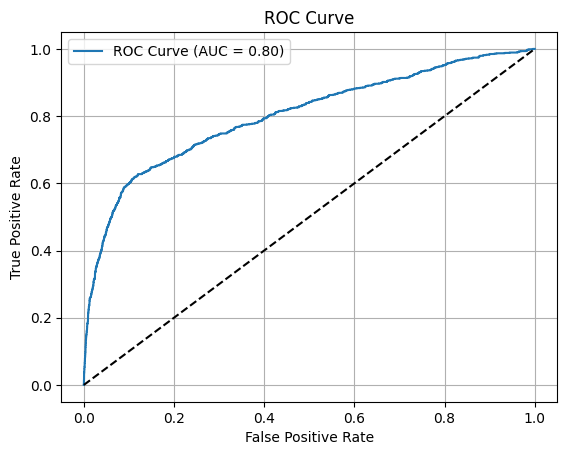

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


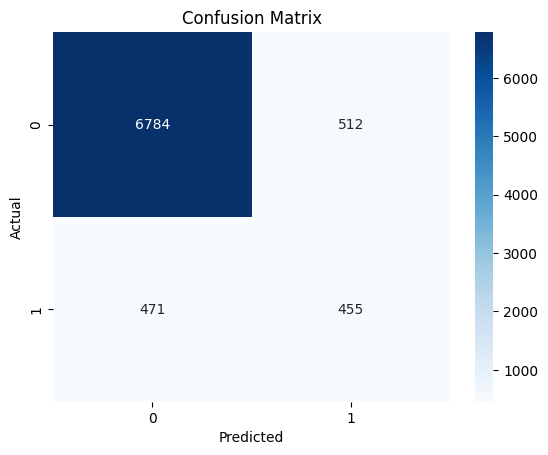

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7296
           1       0.47      0.49      0.48       926

    accuracy                           0.88      8222
   macro avg       0.70      0.71      0.71      8222
weighted avg       0.88      0.88      0.88      8222



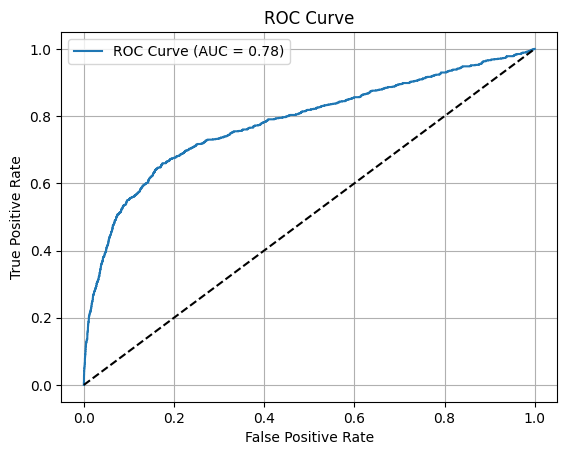

In [ ]:
evaluate_model(models['A'], X_test, y_test, threshold=0.58)
evaluate_model(models['B'], X_test, y_test, threshold=0.58)
evaluate_model(models['C'], X_test, y_test, threshold=0.58)

### 7.1 Comparisons

The table presents a comparative overview of key metrics for the three neural network configurations:

| Metric             | Config A (32, 16) | Config B (64, 32, 16) | Config C (128, 64, 32) |
|---------------|:----------------|:----------------|:----------------|
| Architecture       | 2 Hidden Layers   | 3 Hidden Layers       | 3 Hidden Layers           |
| Accuracy      | 85%          | 87%          | **88%**      |
| Precision (Yes)    | 38%          | 44%          | **47%**      |
| Recall (Yes)       | **61%**      | 60%          | 49%          |
| F1 Score (Yes)      | 48%          | **51%**          | 48%      |
| ROC AUC       | **80%**       | **80%**           | **78%**       |

### 7.2 Trade-offs and Model Selection

The results highlight inherent trade-offs between different performance metrics:

+ Config C: While exhibiting the best accuracy and precision, it suffers from the lowest recall. This means it might miss a significant proportion of potential subscribers, which is undesirable for the marketing campaign objective.
+ Config B: Offers a good balance between precision and recall, as reflected in its highest F1-score. It also has high accuracy and AUC.
+ Config A: Prioritizes recall, capturing the most potential subscribers but at the cost of lower precision. It still maintains a reasonable F1-score and has the highest AUC along with Config B.

**Recommendation**

Given the Bank Marketing application's focus on maximizing outreach and minimizing missed opportunities (false negatives), Config A (same architecture as `model_cw`) stays as a strong candidate due to its highest recall (61%). While its precision is lower than Config B and C, the potential gain in reaching more subscribers is likely to outweigh the marginal increase in false positives (contacting non-subscribers).

However, we have also identified Config B as a compelling alternative, with its balanced F1-score and comparable recall. If the cost of false positives is a significant concern, Config B might be preferred as it offers better precision while still maintaining a reasonable recall.


## 8. Final Report

### 8.1 Objective

This project aimed to apply advanced machine learning techniques—specifically neural networks—to a real-world marketing dataset in order to predict customer subscription to a term deposit. The main focus was to explore class imbalance solutions and optimize the model to align with the business objective of maximizing campaign outreach (recall).

---

### 8.2 Dataset and Problem Formulation

We used the **Bank Marketing dataset** from the UCI repository. The target variable was binary (`y`: subscribed = yes/no), with significant class imbalance (~11% positive). The goal was formulated as a **binary classification** problem.

---

### 8.3 Data Preprocessing

Key preprocessing steps included:
- **Dropping `duration`** due to data leakage concerns.
- **Encoding strategies**:
  - Target encoding for high-cardinality features (`job`, `poutcome`, `month`)
  - Ordinal encoding for `education`
  - One-hot encoding for selected low-cardinality features (`marital`, `contact`, `day_of_week`)
- **Feature transformations**:
  - `pdays` converted to binary flag
  - `previous` binarized
  - Log-transformation for skewed features like `campaign`
- **Scaling**: StandardScaler applied to numeric features
- **Feature Engineering**: Combine highly-correlated features, namely, `euribor3m`, `emp.var.rate`, and `cons.price.idx`, into one new feature `economic_index` .


---

### 8.4 Model Implementation

Two approaches were tested:
- **SMOTE**: Synthetic Minority Oversampling Technique
- **Class Weighting**: Penalizing misclassification of the minority class

Three neural network configurations (A, B, C) were implemented using TensorFlow/Keras:
- Varying depth, activation functions, dropout, batch sizes, optimizers
- All models used the Class Weight strategy
- Evaluation conducted at threshold = 0.58 (identified via threshold sweeping)

---

### 8.5 Evaluation and Findings

| Metric        | Config A       | Config B       | Config C       |
|---------------|----------------|----------------|----------------|
| Accuracy      | 85%          | 87%          | **88%**      |
| Precision (Yes)    | 38%          | 44%          | **47%**      |
| Recall (Yes)       | **61%**      | 60%          | 49%          |
| F1 Score (Yes)      | 48%          | **51%**          | 48%      |
| ROC AUC       | **80%**       | **80%**           | **78%**       |


- **Config B** showed the highest F1 and high recall and strong AUC.
- **Config A** delivered the best recall and ROC AUC.


---

### 8.7 Conclusion

**Config A was selected as the final model** due to its superior recall and strong AUC. The choice was justified by the business context that missing a potential subscriber (false negative) carries a higher cost than contacting a non-subscriber (false positive). A model with higher recall shall be able to capture a higher proportion of actual subscribers. This aligns with the business goal of maximizing outreach in a marketing context.




## 9.  Real-World Implications of the Results

 The insights and final model from this project have direct applications in real-world marketing operations, particularly in marketing campaigns. Several potential business implications include:

1.  Improved Campaign Targeting

 The final model (Config A) offers a high recall rate (61%), making it ideal for identifying a large pool of potential subscribers. This allows marketing teams to maximize outreach efficiency and prioritize customers with a higher likelihood of conversion.

2.  Cost-Efficient Outreach

 Although the model sacrifices some precision, the business cost of false positives in a low-cost communication channel (e.g., email, SMS) is often minimal. The ability to avoid missing actual subscribers (false negatives) outweighs the cost of a few unnecessary contacts.

3.  Strategic Resource Allocation

 Using model predictions, marketing resources (e.g., human agents, follow-up calls, paid advertising) can be concentrated on the most promising leads. This supports data-driven budgeting and ROI optimization.

4.  Scalable Personalization

 As the model handles high-dimensional and encoded features, it can be integrated with personalization systems to adapt outreach based on predicted responsiveness, campaign history, or timing preferences.

5.  Enhanced Customer Experience and Reduced Intrusion

 Beyond simply maximizing reach, the model also contributes to a more positive customer experience. By accurately identifying customers with a higher propensity to subscribe, the targeting exercise minimizes the number of unsolicited or irrelevant communications directed towards customers who are less likely to be interested. This reduction in marketing "noise" not only improves campaign effectiveness but also demonstrates a greater respect for customer preferences and time, potentially strengthening customer relationships and brand perception.


These implications support the model’s practical value in real-world settings and demonstrate how machine learning can enhance marketing effectiveness while maintaining cost-efficiency and ethical responsibility.
    

## 10. References
1. UCI Bank Marketing Dataset
1. Keras Documentation
1. scikit-learn Documentation
1. ChatGPT 4o (collaborate in Neural Network Configuration design)


## 11. Reflection

### 11.1 Challenges Faced and How They Were Addressed

This project presented several practical and technical challenges, especially given the complexity of real-world marketing data and the requirement to use neural network models effectively.

1. **Class Imbalance**  
   The target variable (`y`) was highly imbalanced, with only ~11% positive cases. This led to poor recall using naive models.  
   
   *Solution*: We addressed this using two strategies — **SMOTE oversampling** and **class weighting**. After comparing both, class weighting was chosen for better calibration and generalization.

2. **High-Dimensional Categorical Features**  
   Some categorical variables like `job` and `poutcome` had many unique values. One-hot encoding would have increased dimensionality significantly, risking overfitting.  
    
  *Solution*: Applied **target encoding** for high-cardinality features and **ordinal encoding** where appropriate (e.g., `education`).

3. **Feature Engineering Decisions**  
   Several variables like `duration` and `pdays` required careful interpretation due to their special values and business context.  
  
  *Solution*: We excluded `duration` to avoid data leakage and transformed `pdays` into a binary indicator to reflect meaningful patterns.

4. **Balancing Precision vs Recall**  
   Marketing use cases prioritize recall (reaching as many subscribers as possible), which often reduces precision.  
  
  *Solution*: We performed **threshold sweeping** to identify the optimal probability cutoff, favoring recall while still maintaining reasonable precision / F1-score.

5. **Model Selection and Evaluation**  
   Choosing the right neural network architecture was non-trivial. A simple model might underfit, while a deep model risks overfitting.  
  
  *Solution*: We evaluated three configurations (A, B, C) with different depths, optimizers, and dropout. Each was assessed on accuracy, AUC, F1, and recall to guide selection.

6. **Performance-Interpretability Trade-off**  
   Neural networks are harder to interpret than simpler models like decision trees.  
  
  *Solution*: This was mitigated by careful feature preparation, visualization of thresholds, and alignment of metrics with business goals.

---

### 11.2 Insights Gained from Applying the Selected Method

Working with neural networks on an imbalanced, real-world marketing dataset provided several valuable insights, both technically and from a business perspective:

1. **Neural Networks Require Careful Feature Handling**  
   Neural models are sensitive to feature scaling and encoding. Without proper preprocessing (e.g. standard scaler, target encoding, ordinal mapping), model performance was inconsistent. This reinforced the importance of **data preparation** even when using powerful models.
   
2. **Threshold Tuning is Critical in Imbalanced Settings**  
   The default classification threshold (0.5) is often suboptimal when classes are imbalanced. Applying **threshold sweeping** revealed that the best performance (e.g., maximizing recall or F1) was achieved at a different cutoff. This step provided better alignment with business objectives.

3. **Class Weighting Outperformed SMOTE in Generalization**  
   Although SMOTE helped with recall during training, models using **class weighting** demonstrated **more stable and generalizable performance** on validation sets. This approach also avoided the risk of overfitting to synthetic samples.

4. **Architecture Depth Needs to Match the Task Complexity**  
   Increasing model depth does not always lead to better results. While deeper models (e.g., Config C) improved precision and accuracy, simpler models (Config A) offered better recall. This highlighted that **model complexity must be balanced with the end goal**, not just validation loss.

5. **Model Selection Should Be Driven by Business Priorities**  
   Metrics like AUC and F1 are useful for comparison, but **business context ultimately determines the best model**. In this case, recall was prioritized to maximize outreach. This shaped our final choice of Config A, despite others having higher precision.

6. **Interpretability and Transparency Still Matter**  
   Even though neural networks are often treated as “black boxes,” we found that decisions like excluding `duration` (to prevent leakage) and transforming `pdays` gave us clearer interpretability and confidence in the model pipeline.

### 11.3 Further Improvements

This project lays an excellent learning opportunity for predicting customer response to bank marketing campaigns using Neural Network. To further enhance the model's performance, robustness, and practical applicability, the following areas warrant exploration in future work:

1.  **Hyperparameter Optimization**

 The current model configurations were manually defined. Implementing automated hyperparameter tuning techniques, such as Grid Search, Random Search, or Bayesian Optimization, could systematically explore a wider range of hyperparameter combinations (e.g., number of layers, neurons per layer, learning rate, dropout rate). This could potentially lead to a significant improvement in model accuracy and generalization.

2.  **Regularization Implementation**

 To mitigate overfitting, especially given the class imbalance and the use of SMOTE, incorporating regularization techniques would be a valuable next step. Experimenting with L1 and L2 regularization, or a combination thereof, by adding a `kernel_regularizer` to the Dense layers, could improve the model's ability to generalize to unseen data. Careful tuning of the regularization strength would be necessary to achieve optimal results.

3.  **Cross-Validation**

 The current evaluation relies on a single train-validation-test split. Employing cross-validation techniques (e.g., k-fold cross-validation) would provide a more robust and reliable estimate of the model's performance, reducing the risk of overfitting and providing better confidence in the results.

4.  **Expanded Feature Engineering**

 While the current feature engineering focused primarily on combining economic indicators, exploring additional feature engineering strategies could extract more valuable information from the data. This might include:

 + **Interaction features**: Capturing non-linear relationships between variables.
 + **Polynomial features**: Modeling non-linear trends within individual features.
 + **Recency and frequency features**: Incorporating customer interaction history (if available).

5.  **Comparison with Alternative Modeling**

 Although neural networks were the focus of this project, exploring alternative modeling techniques could offer valuable insights in Machine Learning. Algorithms such as Gradient Boosting Machines (e.g., XGBoost, LightGBM) or ensemble methods might provide competitive or even superior performance, potentially with better interpretability.

